In [9]:
pip install torch-lr-finder

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install torch-lr-finder -v --global-option="apex"

Using pip 23.3.1 from D:\Softwares\anaconda3\envs\pytorch-gpu\Lib\site-packages\pip (python 3.11)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: --build-option and --global-option are deprecated. pip 24.0 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859


In [29]:
from torch_lr_finder import LRFinder
from models import ResNet
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet().to(device)

cuda


In [30]:
from utils import train_transforms, test_transforms, train_test_data_loader

In [31]:
class CIFAR10Dataset(datasets.CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]
        if self.transforms is not None:
          transformed = self.transform(image=image)
          image = transformed["image"]
        return image, label

In [32]:
train = CIFAR10Dataset(root='./data', train=True, transform=train_transforms, download=True)
test = CIFAR10Dataset(root='./data', train=False, transform=test_transforms, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
train_loader, test_loader = train_test_data_loader(train,test)

CUDA Available? True


100%|██████████| 100/100 [03:13<00:00,  1.93s/it]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.91E-01


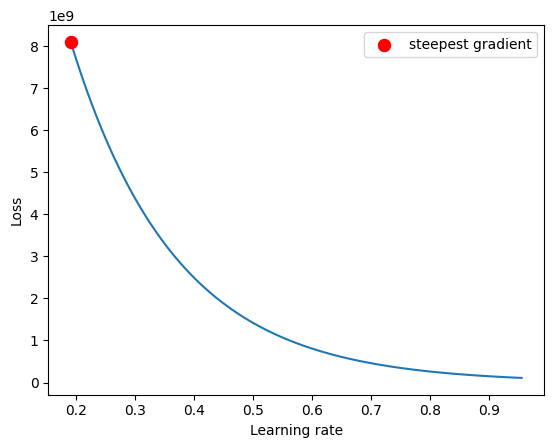

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()